In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_csv('Wholesale_customers_data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
import seaborn as sns

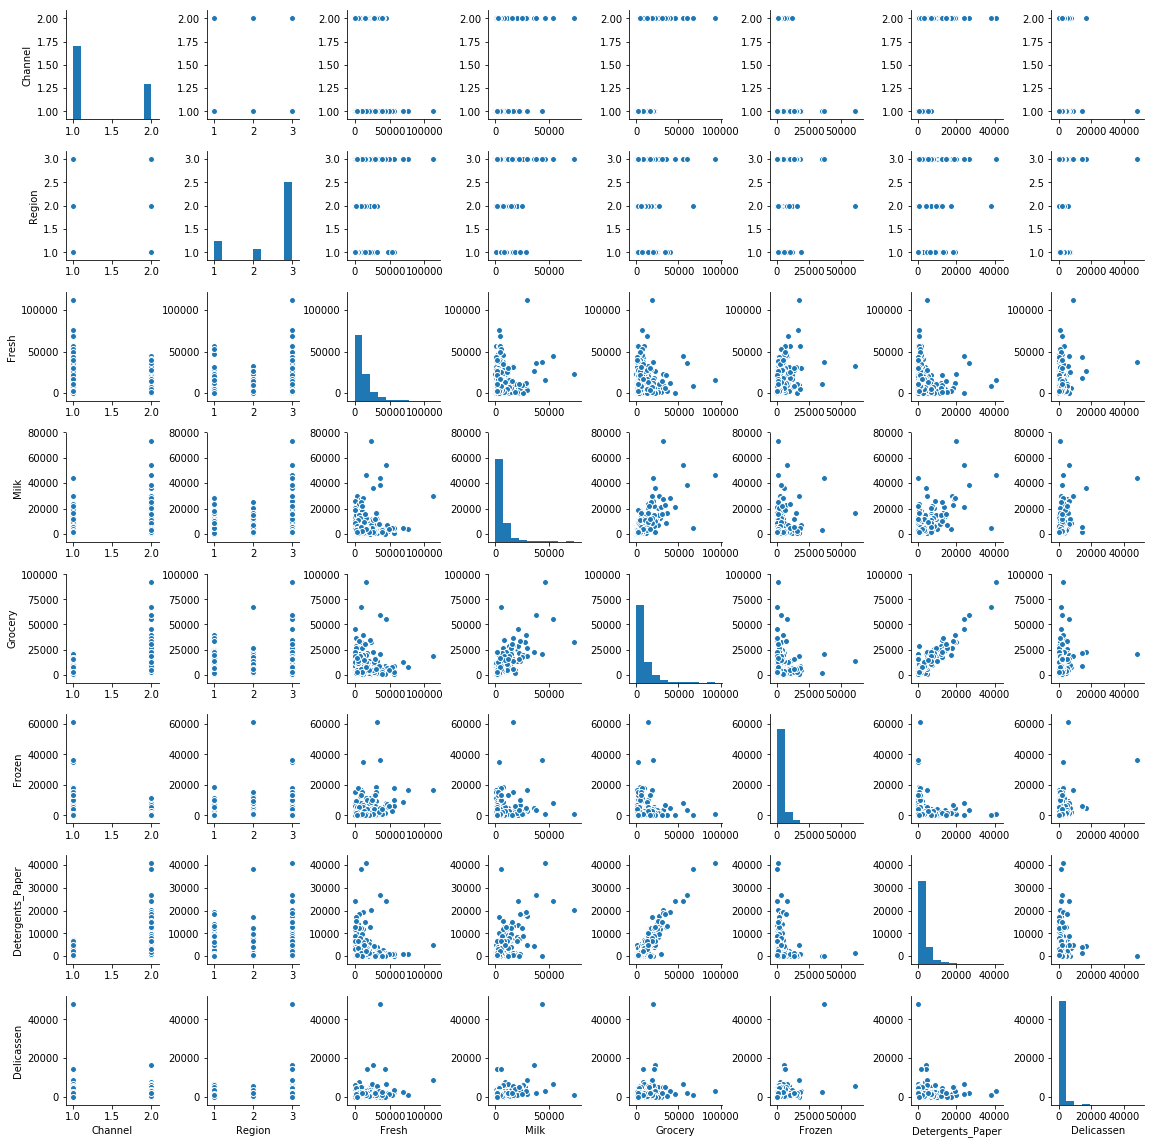

In [5]:
sns.pairplot(data, size=2.0)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X = data.values

In [9]:
X[:5]

array([[    2,     3, 12669,  9656,  7561,   214,  2674,  1338],
       [    2,     3,  7057,  9810,  9568,  1762,  3293,  1776],
       [    2,     3,  6353,  8808,  7684,  2405,  3516,  7844],
       [    1,     3, 13265,  1196,  4221,  6404,   507,  1788],
       [    2,     3, 22615,  5410,  7198,  3915,  1777,  5185]])

In [11]:
scaler.fit(X)

/Users/fukuitomohiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_std = scaler.fit_transform(X)

/Users/fukuitomohiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
from sklearn.decomposition import PCA
pca = PCA() 
X_pca = pca.fit_transform(X_std)

In [14]:
X_pca[:10]

array([[ 0.84393893, -0.51535075, -0.76763222, -0.0442148 , -0.44623405,
        -0.93944129,  0.65476177,  0.01810169],
       [ 1.06267645, -0.48460126, -0.67297526,  0.40137178, -0.13045815,
        -0.86722684,  0.51102248,  0.0778948 ],
       [ 1.26914052,  0.68205455, -0.6640946 ,  1.63495276, -1.19381302,
        -1.07844165, -0.20315184, -0.2540374 ],
       [-1.05678239,  0.6108215 , -0.50565445,  0.19600495,  0.45785461,
         0.11695882, -0.31380387,  0.05437712],
       [ 0.63403048,  0.97419884, -0.77120882,  0.18637413, -0.81387739,
        -1.50537241, -0.16039894,  0.00376343],
       [ 0.5301109 , -0.58541138, -0.75862459,  0.24700875, -0.3788392 ,
        -1.07255387,  0.65856234, -0.02597659],
       [ 0.39956024, -0.84634288, -0.77755246, -0.20696307, -0.1668782 ,
        -1.19917041,  0.03631217, -0.03732631],
       [ 0.79116565, -0.46114017, -0.69660865,  0.48140348, -0.26155495,
        -1.09495488, -0.09240248,  0.06662474],
       [-0.66383113, -0.57746545

In [15]:
print(pca.explained_variance_ratio_)

[0.38750123 0.22374588 0.12647173 0.09229904 0.06957905 0.05741354
 0.03514076 0.00784877]


In [16]:
pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[ 7.54944688e-01,  4.35842847e-02, -4.46303218e-02,
         8.36237039e-01,  9.45381309e-01, -5.28358138e-02,
         9.23483696e-01,  2.90837509e-01],
       [-2.74177624e-01,  5.77686819e-02,  6.87717779e-01,
         2.75305088e-01, -1.16765495e-02,  7.93934508e-01,
        -1.62181045e-01,  7.14152748e-01],
       [-8.35619650e-02, -9.89392835e-01, -8.95748711e-02,
         2.59317203e-02,  4.56322237e-02,  1.23013413e-01,
         4.78145067e-02, -9.36724453e-04],
       [ 2.55021545e-02,  6.69678393e-02, -6.86909437e-01,
         4.64738344e-02, -1.04597692e-01,  1.38776995e-01,
        -1.29912051e-01,  4.62447801e-01],
       [-2.70431332e-02,  9.89745285e-02, -1.92794526e-01,
        -5.38428227e-02,  8.34541080e-02,  5.63341845e-01,
         1.31834635e-01, -4.06946302e-01],
       [-5.85884435e-01,  6.09049053e-02, -1.00060779e-01,
         2.14358464e-01,  1.44993492e-01, -1.31872120e-01,
         1.32817687e-01, -3.70002589e-02],
       [ 7.42607575e-02, -1.235738

In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=20,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_pca[:, 0:2])

In [31]:
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    # 5クラスまでプロットできる
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

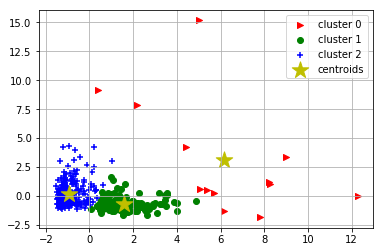

In [32]:
kmeans_plot(3, km, X_pca[:, 0:2])

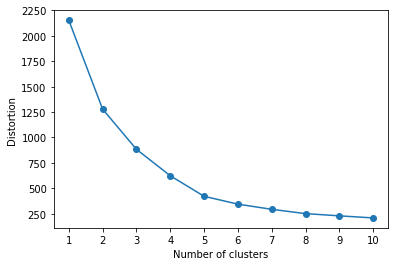

In [33]:
distortions = []

# kを変えながらk-means法を実行
for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=20,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_pca[:, 0:2])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [34]:
y_km

array([1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,

In [35]:
np.sum(y_km==0)

13

#明らかに、クラスター０の要素数が少ないので、クラスター０を外れ値として扱って再分析してみる
また、groceryとdetergents_paperの相関係数が、高いように見えるので、detergents_paperを削除してみる

In [36]:
X_new = X[y_km!=0]

In [38]:
X_new_pca = pca.transform(X_new)

In [39]:
print(pca.explained_variance_ratio_)

[0.38750123 0.22374588 0.12647173 0.09229904 0.06957905 0.05741354
 0.03514076 0.00784877]


In [42]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=20,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_new_km = km.fit_predict(X_new_pca[:, 0:2])

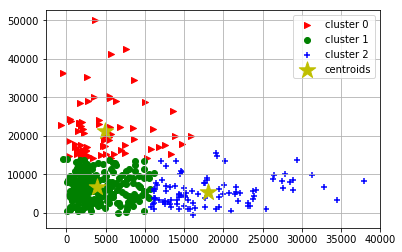

In [43]:
kmeans_plot(3, km, X_new_pca[:, 0:2])

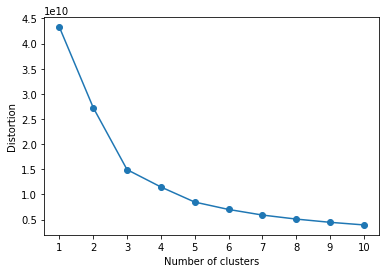

In [44]:
distortions = []

# kを変えながらk-means法を実行
for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=20,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_new_pca[:, 0:2])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#クラスター数3のところで急激に上昇しているので、全ての変数を使った場合上の3つの分割が適切。